In [10]:
model.save("cnn_mnist_model.h5")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


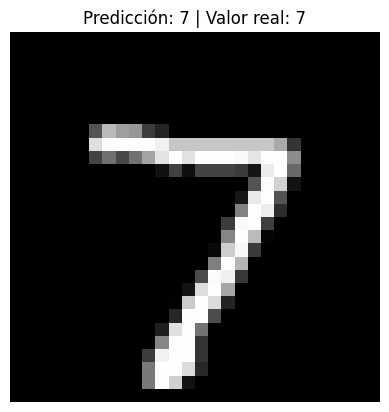

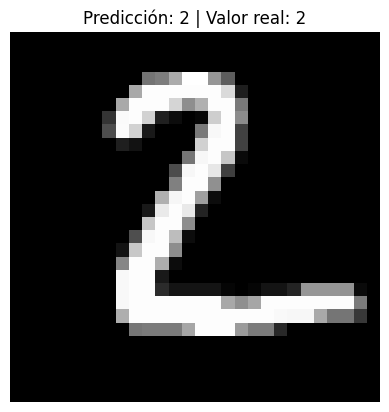

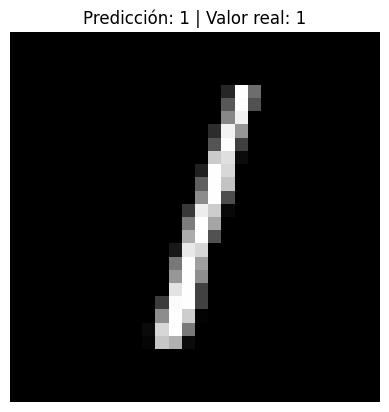

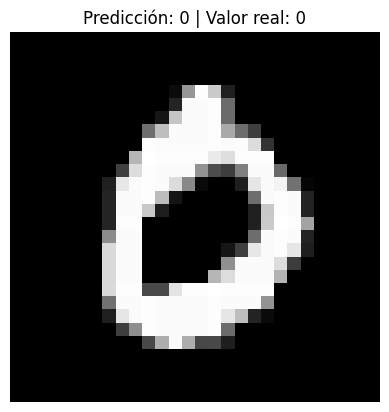

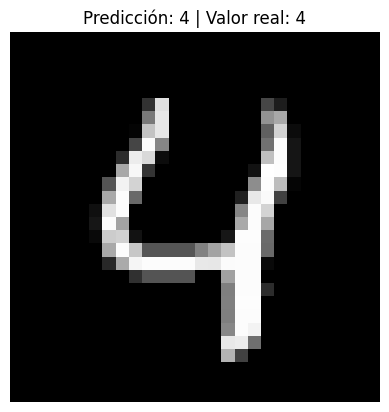

In [9]:
predictions = model.predict(test_images)

for i in range(5):
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicción: {np.argmax(predictions[i])} | Valor real: {test_labels[i]}")
    plt.axis('off')
    plt.show()


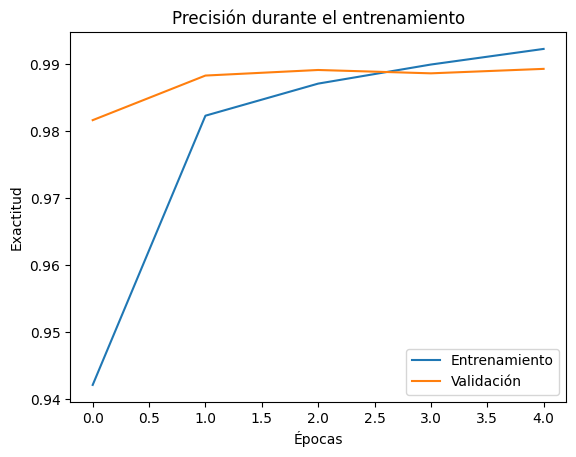

In [8]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print("Exactitud (accuracy) en datos de prueba:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9873 - loss: 0.0477
Exactitud (accuracy) en datos de prueba: 0.9887999892234802


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat,
                    epochs=5,  # puedes probar con 5–10
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8642 - loss: 0.4369 - val_accuracy: 0.9817 - val_loss: 0.0569
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9810 - loss: 0.0623 - val_accuracy: 0.9883 - val_loss: 0.0458
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9884 - loss: 0.0388 - val_accuracy: 0.9892 - val_loss: 0.0405
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9896 - loss: 0.0311 - val_accuracy: 0.9887 - val_loss: 0.0405
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9893 - val_loss: 0.0440


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # capa de salida
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Normalizar los valores de los píxeles a [0,1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Agregar una dimensión de canal (necesaria para la CNN)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# Convertir etiquetas a categóricas (one-hot)
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)

print("Forma de entrada:", train_images.shape)
print("Ejemplo de etiqueta:", train_labels_cat[0])


Forma de entrada: (60000, 28, 28, 1)
Ejemplo de etiqueta: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
from tensorflow.keras.datasets import mnist

# Cargar datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Tamaño del conjunto de entrenamiento:", train_images.shape)
print("Tamaño del conjunto de prueba:", test_images.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de prueba: (10000, 28, 28)


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [1]:

# AF8_RNC - Entrenamiento de Red Neuronal Convolucional
# Nombre: (DEMLL)
# Matrículas : (2041473, 2173882, 2057039, 2053928, 2052196)
# Materia: Inteligencia Artificial
# Hora: (N4)
